# **Approximating Roots of the Equation x^(1/x) = a**

**Objective**:
The goal is to approximate the roots of the equation x^(1/x) = a, where a is a specified constant. This process involves using initial guesses to find values of x that satisfy the equation within a chosen range.

**Methodology**:
1. **Visualization**: We start by graphing the function y = x^(1/x) to gain insights into its behavior and visually identify potential roots.
2. **Root Finding**: Utilizing the visualization, we select an a value that appears to have roots within the observed range. We make initial guesses for x values near these roots. The accuracy of these initial guesses directly impacts the efficiency of the subsequent root-finding process.
3. **Implementation**: The Newton-Raphson method is utilized for refining our initial guesses. This iterative approach leverages the function f(x) = x^(1/x) - a and its derivative to converge on the actual roots.
4. **Multiple Roots**: To find multiple roots simultaneously, we apply the Newton-Raphson method with multiple initial guesses. This process involves iteratively refining each guess and ensuring the uniqueness of each found root to accommodate all possible solutions within the range of interest.

# **Python Implementation**


**Visualizing the Function**:

In [77]:
import matplotlib.pyplot as plt
import numpy as np

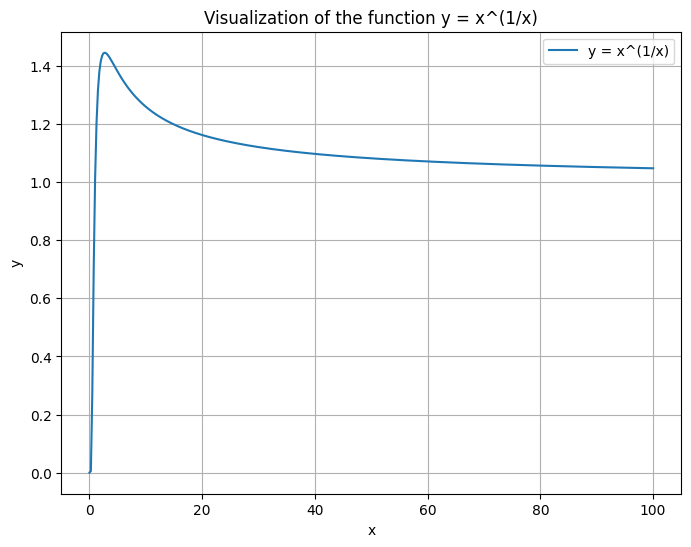

In [62]:
# Define the function y = x^(1/x)
def g(x):
    return x ** (1 / x)

# Generate x values from 0.01 to 4 to avoid division by zero and focus on interesting range
x = np.linspace(0.01, 100, 400)

# Calculate the y values based on the function
y = g(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = x^(1/x)')
plt.title('Visualization of the function y = x^(1/x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# **Finding a Single Root**

Given the function's behavior, we avoid a = 1 due to its infinite roots and choose a = 1.3, observing two distinct roots for x <= 100. Initial guesses are based on the graph's insights, with one guess below 2 (the approximate peak) to find the smaller root and another above to find the larger root.


**Implementing the Newton-Raphson Method**:

In [76]:
def func(x):
    return x**(1/x) - 1.3

def derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

def newton_raphson(f, x0, tol=1e-10, max_iter=1000):
    x = x0
    for _ in range(max_iter):
        df = derivative(f, x)
        if abs(df) < tol:  # Prevent division by very small numbers
            break
        x_new = x - f(x) / df
        if abs(x_new - x) < tol:  # Check convergence
            return x_new
        x = x_new
    return x

# Initial guess for the solution
x_initial = 2

# Use the Newton-Raphson method to find the root
root = newton_raphson(func, x_initial)

print(f"The solution is approximately x = {root}")

The solution is approximately x = 1.4709889600901547


# **Finding Both Roots Simultaneously**

When aiming to find multiple roots, the methodology incorporates running the Newton-Raphson method with a list of initial guesses. This approach allows for the exploration of different segments of the function to identify distinct roots effectively. The choice of initial guesses is critical, with selections made based on visual insights from the function's graph.


**Implementation for Multiple Roots**:

In [79]:
def find_roots(f, initial_guesses, tol=1e-10, max_iter=1000):
    roots = []
    for x_initial in initial_guesses:
        root = newton_raphson(f, x_initial, tol, max_iter)
        # Check if the found root is unique (not already in the list)
        if not any(abs(root - existing_root) < tol for existing_root in roots):
            roots.append(root)
    return roots

initial_guesses = [0.5, 10]

# Function to find the roots for
def func_to_solve(x):
    return x**(1/x) - 1.3
    
# Find roots using multiple initial guesses
roots_found = find_roots(func_to_solve, initial_guesses)

roots_found

[1.4709889600901542, 7.857065351164321]